<a href="https://colab.research.google.com/github/Howardtheduck1127/ConsentFlow/blob/master/checkpoint1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Checkpoint 1
## (Do not remove any comments that start with"# @@@".)

Reminder:

- You are being evaluated for completion and effort in this checkpoint.
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.
- Please do not remove any comment that starts with: "# @@@".

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>).


Include comments throughout your code! Every cleanup and preprocessing task should be documented.


<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pd.set_option("display.max_columns", 100)

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [2]:
from google.colab import files
uploaded = files.upload()
df = pd.read_csv("states_edu.csv")

Saving states_edu.csv to states_edu.csv


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [4]:
df.columns = (
    df.columns.str.strip()
              .str.lower()
              .str.replace("[^a-z0-9]+", "_", regex=True)
)

df.head()

,primary_key,state,year,enroll,total_revenue,federal_revenue,state_revenue,local_revenue,total_expenditure,instruction_expenditure,support_services_expenditure,other_expenditure,capital_outlay_expenditure,grades_pk_g,grades_kg_g,grades_4_g,grades_8_g,grades_12_g,grades_1_8_g,grades_9_12_g,grades_all_g,avg_math_4_score,avg_math_8_score,avg_reading_4_score,avg_reading_8_score
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,735036.0,NaN,174053.0,8224.0,55460.0,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,350902.0,NaN,37451.0,2371.0,10152.0,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,1007732.0,NaN,609114.0,2544.0,53497.0,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,483488.0,NaN,145212.0,808.0,33511.0,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,8520926.0,NaN,2044688.0,59067.0,431763.0,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *ENTER YOUR CHOICE HERE*

How many years of data are logged in our dataset?

In [6]:
# @@@ 1
# Your Code
year_col = "year" if "year" in df.columns else None
years_logged = df[year_col].nunique() if year_col else np.nan
print("Years logged in dataset:", years_logged)

Years logged in dataset: 33


Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [8]:
# @@@ 2
# Robust Michigan vs. Ohio comparison

# 1) Ensure we have a state column
if 'state_col' not in locals() or state_col is None or state_col not in df.columns:
    candidates = [c for c in df.columns
                  if c.lower() in ('state', 'state_name', 'location', 'jurisdiction',
                                   'stateabbr', 'state_abbr', 'state_code')]
    if not candidates:
        candidates = [c for c in df.columns if 'state' in c.lower()]
    state_col = candidates[0] if candidates else None

assert state_col is not None, f"No state-like column found. Columns: {df.columns.tolist()}"

# 2) Ensure we have a chosen test column (target_col)
if 'target_col' not in locals() or target_col not in df.columns:
    # try to auto-detect Grade 4 Math as a sensible default
    c4m = [c for c in df.columns
           if ('math' in c.lower()) and ('4' in c) and ('score' in c.lower())]
    if not c4m:
        c4m = [c for c in df.columns if 'avg_math_4' in c.lower()]
    assert c4m, "Couldn't detect a test-score column; please set target_col manually."
    target_col = c4m[0]

# 3) Compare MI vs OH (support both names and abbreviations)
vals = df[state_col].astype(str).str.upper()
mi_mask = vals.isin(['MICHIGAN', 'MI'])
oh_mask = vals.isin(['OHIO', 'OH'])

mi_avg = df.loc[mi_mask, target_col].astype(float).mean()
oh_avg = df.loc[oh_mask, target_col].astype(float).mean()

print(f"state_col = {state_col} | target_col = {target_col}")
print(f"Michigan average ({target_col}): {mi_avg:.2f}")
print(f"Ohio     average ({target_col}): {oh_avg:.2f}")
print("Higher:", "Michigan" if mi_avg > oh_avg else ("Ohio" if oh_avg > mi_avg else "Tie"))


state_col = state | target_col = avg_math_4_score
Michigan average (avg_math_4_score): 234.36
Ohio     average (avg_math_4_score): 239.45
Higher: Ohio


Find the average for your chosen test across all states in 2019

In [9]:
# @@@ 3
if year_col:
    avg_2019 = df.loc[df[year_col] == 2019, target_col].mean()
    print(f"Average {chosen_label} across all states in 2019: {avg_2019:.2f}")
else:
    print("No 'year' column available.")


Average Grade 4 Math across all states in 2019: 239.94


For each state, find a maximum value for your chosen test score

In [10]:
# @@@ 4
state_max = (
    df.dropna(subset=[target_col])
      .groupby(state_col, as_index=True)[target_col]
      .max()
      .sort_values(ascending=False)
)
state_max.head(10)


,avg_math_4_score
state,
MASSACHUSETTS,253.0
MINNESOTA,253.0
NEW_HAMPSHIRE,253.0
DODEA,250.0
INDIANA,249.0
NEW_JERSEY,249.0
VERMONT,248.0
VIRGINIA,248.0
WYOMING,248.0


*Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable.

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [11]:
# @@@ 5
df_fe = df.copy()

# Detect enrollment & finance columns (common names in this dataset family)
enroll_col = next((c for c in df_fe.columns if "enroll" in c), None)

finance_candidates = {
    "total_expenditure": [c for c in df_fe.columns if "total_expenditure" in c],
    "instruction_expenditure": [c for c in df_fe.columns if "instruction_expenditure" in c],
    "support_services_expenditure": [c for c in df_fe.columns if "support_services_expenditure" in c],
    "total_revenue": [c for c in df_fe.columns if "total_revenue" in c],
}

# Per-pupil versions if enrollment exists
if enroll_col:
    for name, cols in finance_candidates.items():
        if cols:
            col = cols[0]
            df_fe[f"pp_{name}"] = df_fe[col] / df_fe[enroll_col]

    # Spending intensity bins (quartiles) for instruction spending per pupil
    if "pp_instruction_expenditure" in df_fe.columns:
        df_fe["pp_instruction_quartile"] = pd.qcut(
            df_fe["pp_instruction_expenditure"],
            q=4,
            labels=["Q1 (Lowest)", "Q2", "Q3", "Q4 (Highest)"]
        )
else:
    print("Enrollment column not found; skipping per-pupil features.")

# Quick peek of engineered columns
engineered_cols = [c for c in df_fe.columns if c.startswith("pp_")] + ["pp_instruction_quartile"]
df_fe[engineered_cols].head()


,pp_total_expenditure,pp_instruction_expenditure,pp_support_services_expenditure,pp_total_revenue,pp_instruction_quartile,pp_instruction_quartile
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN


Feature engineering justification: **<BRIEFLY DESCRIBE WHY YOU MADE THE CHANGES THAT YOU DID\>**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

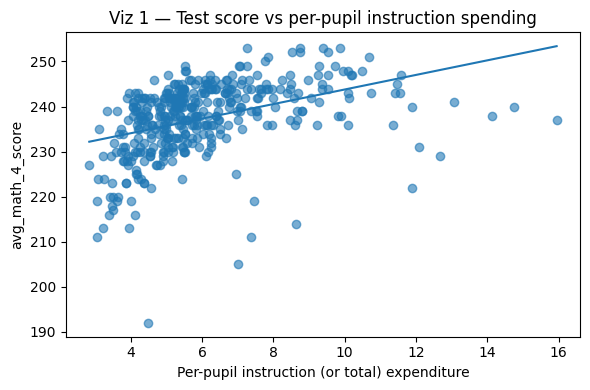

Pearson r (score vs per-pupil instruction): 0.408


In [12]:
# @@@ 6
# Scatter: chosen test vs. per-pupil *instruction* spending, with a trendline.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# --- Ensure base df exists and columns are normalized ---
assert 'df' in globals(), "Run the earlier cell that loads states_edu.csv into df."
if not any(ch.isupper() for ch in df.columns[0]):  # assume already normalized
    pass
else:
    df.columns = (df.columns.str.strip()
                            .str.lower()
                            .str.replace("[^a-z0-9]+", "_", regex=True))

# --- Find target column (defaults to Grade 4 Math) ---
if 'target_col' not in globals() or target_col not in df.columns:
    c4m = [c for c in df.columns if ('math' in c and '4' in c and 'score' in c)]
    if not c4m:
        c4m = [c for c in df.columns if 'avg_math_4' in c]
    assert c4m, f"Couldn't detect Grade 4 Math. Columns: {df.columns.tolist()}"
    target_col = c4m[0]

# --- Detect enrollment + instruction_expenditure to make per-pupil feature if needed ---
enroll_col = next((c for c in df.columns if 'enroll' in c), None)
pp_instr_col = 'pp_instruction_expenditure'
if pp_instr_col not in df.columns:
    instr_cols = [c for c in df.columns if 'instruction_expenditure' in c]
    if instr_cols and enroll_col:
        df[pp_instr_col] = df[instr_cols[0]] / df[enroll_col]
    else:
        # fallback: if no instruction, try total_expenditure
        tot_cols = [c for c in df.columns if 'total_expenditure' in c]
        if tot_cols and enroll_col:
            df[pp_instr_col] = df[tot_cols[0]] / df[enroll_col]
        else:
            raise ValueError("Could not create per-pupil instruction/total expenditure; "
                             "check that enrollment and expenditure columns exist.")

# --- Build plotting frame and drop NAs ---
d = df[[target_col, pp_instr_col]].dropna().copy()
d = d[np.isfinite(d[target_col]) & np.isfinite(d[pp_instr_col])]

# --- Plot scatter + simple linear trendline ---
plt.figure(figsize=(6,4))
plt.scatter(d[pp_instr_col], d[target_col], alpha=0.6)
m, b = np.polyfit(d[pp_instr_col], d[target_col], 1)
xs = np.linspace(d[pp_instr_col].min(), d[pp_instr_col].max(), 200)
plt.plot(xs, m*xs + b)
plt.xlabel("Per-pupil instruction (or total) expenditure")
plt.ylabel(target_col)
plt.title("Viz 1 — Test score vs per-pupil instruction spending")
plt.tight_layout()
plt.show()

# Quick stat:
corr = np.corrcoef(d[pp_instr_col], d[target_col])[0,1]
print(f"Pearson r (score vs per-pupil instruction): {corr:.3f}")

# Save predictor name to reuse later
pred1 = pp_instr_col


**<CAPTION FOR VIZ 1>**

**Visualization 2**

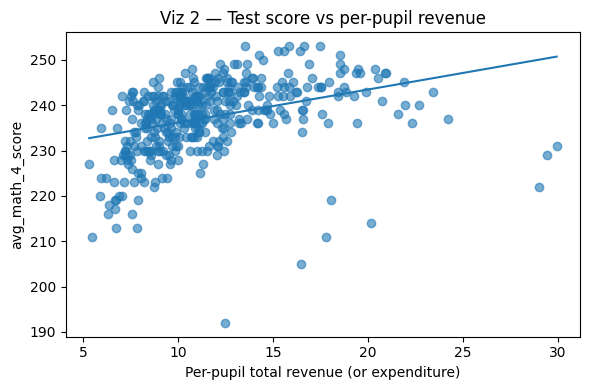

Pearson r (score vs per-pupil revenue): 0.350


In [13]:
# @@@ 7
# Scatter: chosen test vs. per-pupil *total revenue*, with trendline.

# Try to create/find pp_total_revenue
pp_rev_col = 'pp_total_revenue'
if pp_rev_col not in df.columns:
    tot_rev_cols = [c for c in df.columns if 'total_revenue' in c]
    if tot_rev_cols and enroll_col:
        df[pp_rev_col] = df[tot_rev_cols[0]] / df[enroll_col]
    else:
        # fallback: per-pupil total_expenditure if revenue missing
        tot_exp_cols = [c for c in df.columns if 'total_expenditure' in c]
        if tot_exp_cols and enroll_col:
            df[pp_rev_col] = df[tot_exp_cols[0]] / df[enroll_col]
        else:
            raise ValueError("Could not create per-pupil revenue/expenditure; "
                             "check that enrollment and finance columns exist.")

d2 = df[[target_col, pp_rev_col]].dropna().copy()
d2 = d2[np.isfinite(d2[target_col]) & np.isfinite(d2[pp_rev_col])]

plt.figure(figsize=(6,4))
plt.scatter(d2[pp_rev_col], d2[target_col], alpha=0.6)
m2, b2 = np.polyfit(d2[pp_rev_col], d2[target_col], 1)
xs2 = np.linspace(d2[pp_rev_col].min(), d2[pp_rev_col].max(), 200)
plt.plot(xs2, m2*xs2 + b2)
plt.xlabel("Per-pupil total revenue (or expenditure)")
plt.ylabel(target_col)
plt.title("Viz 2 — Test score vs per-pupil revenue")
plt.tight_layout()
plt.show()

corr2 = np.corrcoef(d2[pp_rev_col], d2[target_col])[0,1]
print(f"Pearson r (score vs per-pupil revenue): {corr2:.3f}")

pred2 = pp_rev_col



**<CAPTION FOR VIZ 2>**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
# @@@ 8

# X =
# y =

model_df = df[[target_col, pred1, pred2]].dropna().copy()
model_df = model_df[np.isfinite(model_df[target_col]) &
                    np.isfinite(model_df[pred1]) &
                    np.isfinite(model_df[pred2])]

X = model_df[[pred1, pred2]].astype(float)
y = model_df[target_col].astype(float)

print("X shape:", X.shape, "| y shape:", y.shape)
X.head()

X shape: (398, 2) | y shape: (398,)


,pp_instruction_expenditure,pp_total_revenue
408,3.494616,6.691350
410,3.054628,6.724498
411,3.397068,6.311367
412,3.957355,7.847296
414,6.013095,11.094435


In [16]:
# @@@ 9

# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
     X, y, test_size=0.2, random_state=42
)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(318, 2) (80, 2) (318,) (80,)


<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [17]:
# @@@ 10
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [18]:
# @@@ 11
# create your model here
# model =
model = LinearRegression()

In [19]:
model.fit(X_train, y_train)

LinearRegression()

In [20]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [24]:
# @@@ 12
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import sklearn
print("sklearn version:", sklearn.__version__)

# Make sure arrays are 1D
y_true = np.ravel(y_test)
y_hat  = np.ravel(y_pred)

mae = mean_absolute_error(y_true, y_hat)

# Robust RMSE: try new API; if not available, compute sqrt(MSE)
try:
    rmse = mean_squared_error(y_true, y_hat, squared=False)
except TypeError:
    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)

r2  = r2_score(y_true, y_hat)

print(f"MAE : {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2 : {r2:.3f}")


sklearn version: 1.6.1
MAE : 5.98
RMSE: 8.04
R^2 : 0.222


We have copied over the graphs that visualize the model's performance on the training and testing set.

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

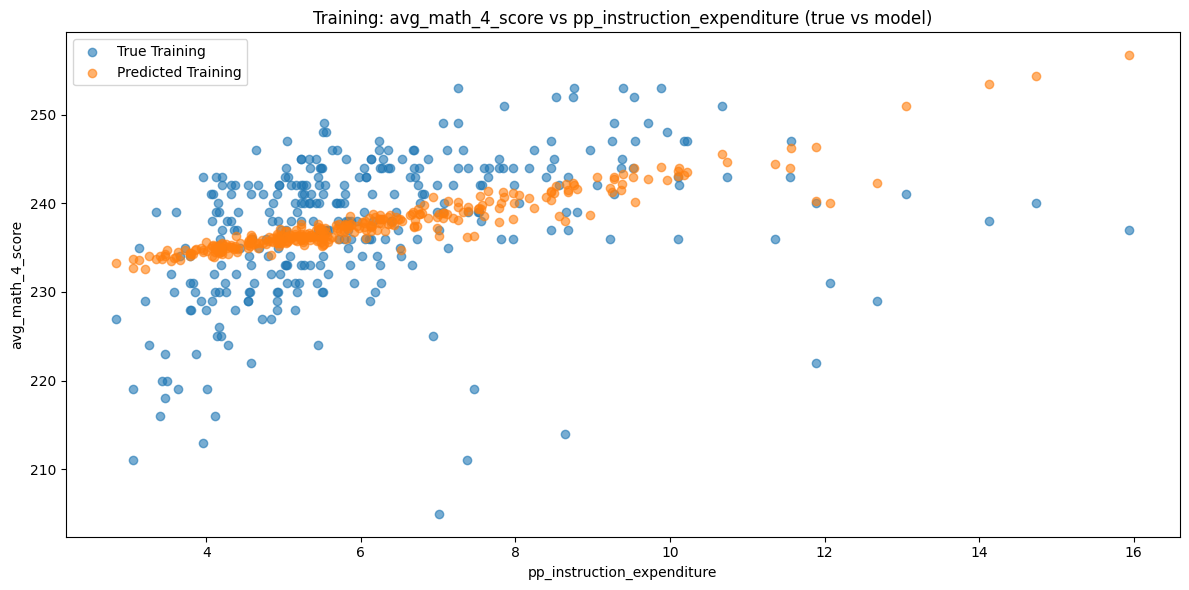

In [25]:
# @@@ 13

# col_name = 'COLUMN NAME OF ONE PREDICTOR'


# f = plt.figure(figsize=(12,6))
# plt.scatter(X_train[col_name], y_train, color = "red")
# plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

# plt.legend(['True Training','Predicted Training'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior On Training Set")

col_name = pred1  # or: pred2

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, alpha=0.6, label="True Training")
plt.scatter(X_train[col_name], model.predict(X_train), alpha=0.6, label="Predicted Training")

plt.xlabel(col_name)
plt.ylabel(target_col)
plt.legend()
plt.title(f"Training: {target_col} vs {col_name} (true vs model)")
plt.tight_layout()
plt.show()



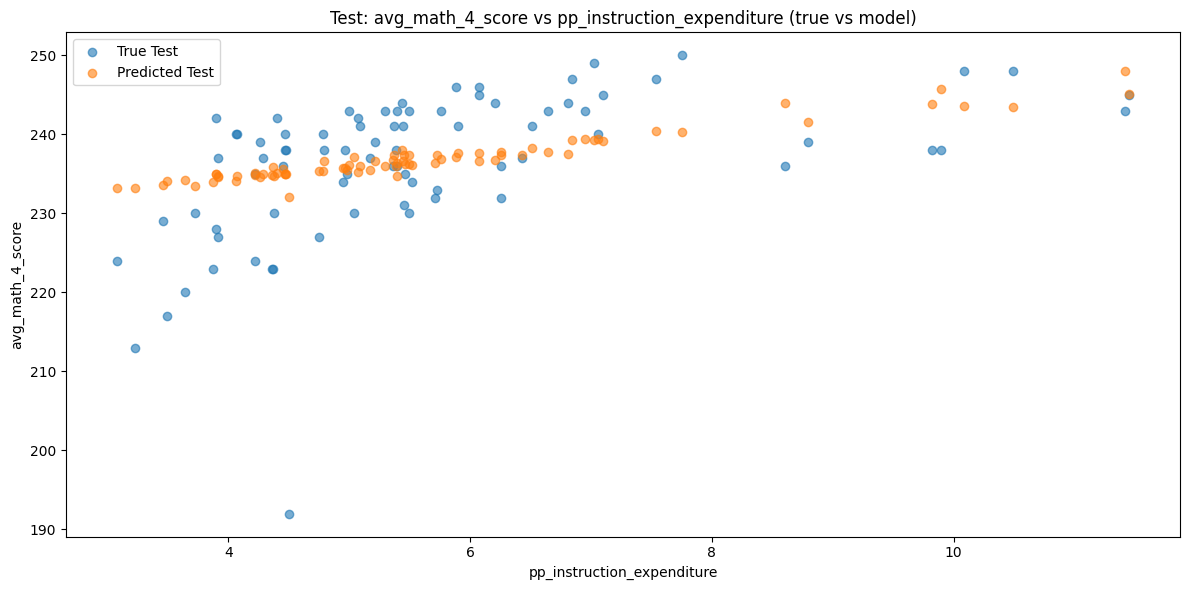

In [26]:
# @@@ 14


# col_name = 'COLUMN NAME OF ONE PREDICTOR"


# f = plt.figure(figsize=(12,6))
# plt.scatter(X_test[col_name], y_test, color = "blue")
# plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

# plt.legend(['True testing','Predicted testing'])
# plt.xlabel(col_name)
# plt.ylabel('NAME OF THE PREDICTOR')
# plt.title("Model Behavior on Testing Set")

col_name = pred1

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, alpha=0.6, label="True Test")
plt.scatter(X_test[col_name], model.predict(X_test), alpha=0.6, label="Predicted Test")

plt.xlabel(col_name)
plt.ylabel(target_col)
plt.legend()
plt.title(f"Test: {target_col} vs {col_name} (true vs model)")
plt.tight_layout()
plt.show()
